In [3]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [4]:
df = pd.read_csv('data/Aviation_Data.csv')

/Users/Lydia/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
df.loc[0]

Event.Id                   20001218X45444
Investigation.Type               Accident
Accident.Number                SEA87LA080
Event.Date                     1948-10-24
Location                  MOOSE CREEK, ID
Country                     United States
Latitude                              NaN
Longitude                             NaN
Airport.Code                          NaN
Airport.Name                          NaN
Injury.Severity                  Fatal(2)
Aircraft.damage                 Destroyed
Aircraft.Category                     NaN
Registration.Number                NC6404
Make                              Stinson
Model                               108-3
Amateur.Built                          No
Number.of.Engines                       1
Engine.Type                 Reciprocating
FAR.Description                       NaN
Schedule                              NaN
Purpose.of.flight                Personal
Air.carrier                           NaN
Total.Fatal.Injuries              

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [7]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [8]:
df["Amateur.Built"].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

In [9]:
df["Schedule"].value_counts()

NSCH    4474
UNK     4099
SCHD    4009
Name: Schedule, dtype: int64

In [10]:
#VMC is Visual flying, or clear
#IMC is instrument flying, or low visibility
#UNK and unk are unknown and need to be cleaned
df['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [11]:
df['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [12]:
df['Make'].value_counts()

Cessna              22227
Piper               12029
CESSNA               4922
Beech                4330
PIPER                2841
                    ...  
Joseph E. Crosby        1
Towner                  1
DAVID FITZGERALD        1
FPNA                    1
Ives                    1
Name: Make, Length: 8237, dtype: int64

In [13]:
df['Model'].value_counts()

152            2367
172            1756
172N           1164
PA-28-140       932
150             829
               ... 
MXL SPORT         1
Sopwith F1        1
C-54GDC           1
VARIEZE 100       1
J6-KARATOO        1
Name: Model, Length: 12318, dtype: int64

In [14]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Year'] = df['Event.Date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                88889 non-null  object        
 1   Investigation.Type      90348 non-null  object        
 2   Accident.Number         88889 non-null  object        
 3   Event.Date              88889 non-null  datetime64[ns]
 4   Location                88837 non-null  object        
 5   Country                 88663 non-null  object        
 6   Latitude                34382 non-null  object        
 7   Longitude               34373 non-null  object        
 8   Airport.Code            50249 non-null  object        
 9   Airport.Name            52790 non-null  object        
 10  Injury.Severity         87889 non-null  object        
 11  Aircraft.damage         85695 non-null  object        
 12  Aircraft.Category       32287 non-null  object

In [15]:
#Where do we need to clean/combine names?
list(df['Make'].unique())

['Stinson',
 'Piper',
 'Cessna',
 'Rockwell',
 'Mcdonnell Douglas',
 'North American',
 'Beech',
 'Bellanca',
 'Navion',
 'Enstrom',
 'Smith',
 'Bell',
 'Grumman',
 'Beechcraft',
 'Maule',
 'Air Tractor',
 'Aerospatiale',
 'Mooney',
 'Boeing',
 'Curtis',
 'Schleicher',
 'Quickie',
 'Lockheed',
 'Embraer',
 'Hughes',
 'Swearingen',
 'De Havilland',
 'Bell Helicopter',
 'Bede Aircraft',
 'Convair',
 'Beachner',
 'Canadair',
 'Douglas',
 'Sons Mustang',
 'Dassault/sud',
 'Sikorsky',
 'Bell/textron',
 'Robertson',
 'Aeronca',
 'Smith Miniplane',
 'Mitsubishi',
 'Mcdonnell-douglas',
 'Taylorcraft',
 'Ted Smith',
 'Robinson',
 'Raven',
 'Ercoupe',
 'Rockwell Comdr',
 'Howard Aircraft Corp.',
 'Porterfield',
 'Nihon',
 'Great Lakes',
 'Balloon Works',
 'Pitts',
 'Fairchild Hiller',
 'Kaman',
 'Weatherly',
 'Eagle',
 'Barnes',
 'Schweizer',
 'Starduster Ii',
 'Homebuilt',
 'Smith Mini',
 'Smith Aerostar',
 'Rockwell Intl',
 'Hiller',
 'Schreder',
 'Varga',
 'Hatz',
 'Nord Aviation',
 'Crook',


In [16]:
df['Model'].value_counts()

152            2367
172            1756
172N           1164
PA-28-140       932
150             829
               ... 
MXL SPORT         1
Sopwith F1        1
C-54GDC           1
VARIEZE 100       1
J6-KARATOO        1
Name: Model, Length: 12318, dtype: int64

In [17]:
df['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(72)         1
Fatal(174)        1
Fatal(110)        1
Fatal(229)        1
Fatal(125)        1
Name: Injury.Severity, Length: 109, dtype: int64

In [18]:
df['Amateur.Built'].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

In [19]:

df.drop(df[df['Amateur.Built'] == 'Yes'].index, inplace = True)


In [20]:
df['Amateur.Built'].value_counts()

No    80312
Name: Amateur.Built, dtype: int64

In [21]:
df["Make"].value_counts()

Cessna                       22143
Piper                        11987
CESSNA                        4922
Beech                         4314
PIPER                         2839
                             ...  
GLASER-DIRKS                     1
Delts Wing Kites                 1
BRITISH AIRCRAFT CORP.           1
Gulfstream Aerospace Corp        1
Mk Ii                            1
Name: Make, Length: 2363, dtype: int64

In [22]:
df = df[df['Make'].isin(df['Make'].value_counts()[df['Make'].value_counts() > 79].index)]
df["Make"].value_counts()

Cessna               22143
Piper                11987
CESSNA                4922
Beech                 4314
PIPER                 2839
                     ...  
Aerostar                87
Weatherly               86
Raven                   86
British Aerospace       85
CIRRUS                  80
Name: Make, Length: 78, dtype: int64

In [23]:
#This describes the level of restriction. 91 is least restrictive, 135 is charters, 121 is commercial carriers. These regulations were first written in 1958.
df['FAR.Description'].value_counts()

091                               11601
Part 91: General Aviation          5256
NUSN                               1185
NUSC                                822
137                                 658
135                                 565
121                                 479
Part 137: Agricultural              391
Part 135: Air Taxi & Commuter       266
UNK                                 242
129                                 210
PUBU                                161
Part 121: Air Carrier               143
Non-U.S., Non-Commercial             86
Part 129: Foreign                    77
Non-U.S., Commercial                 73
133                                  65
Part 133: Rotorcraft Ext. Load       25
Unknown                              17
Public Use                           13
091K                                  8
ARMF                                  4
Part 125: 20+ Pax,6000+ lbs           2
Public Aircraft                       2
125                                   1


In [24]:
df['Aircraft.Category'].value_counts()

Airplane        19799
Helicopter       2511
Glider            159
Balloon            28
Unknown             4
Powered-Lift        2
Name: Aircraft.Category, dtype: int64

In [25]:
df['Investigation.Type'].value_counts()

Accident    67229
Incident     3166
Name: Investigation.Type, dtype: int64

In [26]:
df['Aircraft.damage'].value_counts()

Substantial    50971
Destroyed      14621
Minor           2228
Unknown           93
Name: Aircraft.damage, dtype: int64

In [27]:
df['Number.of.Engines'].value_counts()

1.0    55207
2.0     9297
0.0      655
3.0      433
4.0      394
Name: Number.of.Engines, dtype: int64

In [28]:
df['Engine.Type'].value_counts()

Reciprocating      56148
Turbo Shaft         2919
Turbo Prop          2581
Turbo Fan           1953
Unknown             1449
Turbo Jet            468
Geared Turbofan       11
None                   2
UNK                    1
Name: Engine.Type, dtype: int64

In [29]:
df['Total.Fatal.Injuries'].value_counts()

0.0      48118
1.0       5993
2.0       3958
3.0       1387
4.0       1003
         ...  
27.0         1
295.0        1
37.0         1
144.0        1
143.0        1
Name: Total.Fatal.Injuries, Length: 117, dtype: int64

In [30]:
df['Total.Serious.Injuries'].value_counts()

0.0      50829
1.0       6467
2.0       2228
3.0        536
4.0        229
5.0         68
6.0         34
7.0         22
10.0        13
9.0          9
13.0         8
8.0          8
11.0         5
14.0         5
26.0         4
20.0         3
25.0         3
12.0         3
28.0         3
59.0         2
17.0         2
50.0         2
47.0         2
21.0         2
41.0         1
18.0         1
88.0         1
161.0        1
33.0         1
67.0         1
81.0         1
39.0         1
55.0         1
137.0        1
34.0         1
53.0         1
35.0         1
16.0         1
106.0        1
44.0         1
27.0         1
125.0        1
45.0         1
15.0         1
60.0         1
Name: Total.Serious.Injuries, dtype: int64

In [31]:
df['Total.Minor.Injuries'].value_counts()

0.0      48949
1.0       7679
2.0       2967
3.0        698
4.0        344
5.0        109
6.0         53
7.0         50
9.0         21
8.0         18
13.0        13
10.0        11
12.0         9
11.0         8
14.0         7
17.0         7
18.0         6
22.0         5
19.0         5
24.0         5
15.0         4
16.0         4
33.0         4
25.0         4
21.0         3
23.0         3
32.0         3
27.0         3
20.0         3
38.0         2
28.0         2
50.0         2
42.0         2
36.0         2
26.0         2
29.0         1
58.0         1
39.0         1
47.0         1
200.0        1
65.0         1
84.0         1
62.0         1
125.0        1
96.0         1
171.0        1
35.0         1
31.0         1
71.0         1
30.0         1
45.0         1
57.0         1
43.0         1
69.0         1
Name: Total.Minor.Injuries, dtype: int64

In [32]:
df['Total.Uninjured'].value_counts()

0.0      21977
1.0      20221
2.0      13457
3.0       3869
4.0       2419
         ...  
314.0        1
247.0        1
439.0        1
280.0        1
399.0        1
Name: Total.Uninjured, Length: 377, dtype: int64

In [33]:
#doesn't work
#df['Total.Injuries'] = df['Total.Uninjured']+df['Total.Minor.Injuries']+df['Total.Serious.Injuries']+df['Total.Fatal.Injuries']

In [34]:
df['Report.Status'].value_counts()

Probable Cause                                                                                                                                                                                                                   52069
Foreign                                                                                                                                                                                                                           1732
Factual                                                                                                                                                                                                                            125
<br /><br />                                                                                                                                                                                                                       119
The pilot's failure to maintain directional control during the landing roll.

In [35]:
df['Total.Fatal.Injuries'].mode()

0    0.0
dtype: float64

<AxesSubplot:xlabel='Year', ylabel='Total.Fatal.Injuries'>

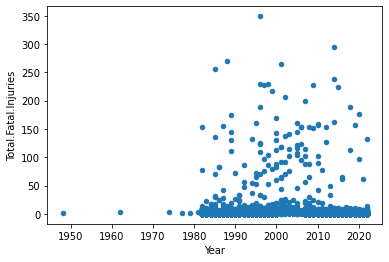

In [36]:
df.plot.scatter(x='Year', y='Total.Fatal.Injuries')

In [37]:
injuries_df = df[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']]
injuries_df.head()
injuries_df_fill = injuries_df.fillna(0)
injuries_df_fill.head()

,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
0,2.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0
2,3.0,0.0,0.0,0.0
3,2.0,0.0,0.0,0.0
4,1.0,2.0,0.0,0.0


In [38]:
df['Make'] = df['Make'].str.capitalize()

In [39]:
df['Make'].value_counts()

Cessna                            27065
Piper                             14826
Beech                              5356
Boeing                             2731
Bell                               2703
Mooney                             1325
Robinson                           1221
Grumman                            1090
Bellanca                           1040
Hughes                              929
Schweizer                           770
Air tractor                         691
Aeronca                             634
Maule                               588
Mcdonnell douglas                   522
Champion                            515
Stinson                             438
Luscombe                            412
De havilland                        380
Aero commander                      358
Aerospatiale                        340
Rockwell                            330
Taylorcraft                         321
Hiller                              308
North american                      304


In [40]:
df["Number.of.Engines"].value_counts()

1.0    55207
2.0     9297
0.0      655
3.0      433
4.0      394
Name: Number.of.Engines, dtype: int64

In [41]:
df['Aircraft.damage'].value_counts()

Substantial    50971
Destroyed      14621
Minor           2228
Unknown           93
Name: Aircraft.damage, dtype: int64

In [42]:
df.head(15)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979.0
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.4453,-70.7583,NaN,NaN,...,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017,1979.0
6,20001218X45446,Accident,CHI81LA106,1981-08-01,"COTTON, MN",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,IMC,Unknown,Probable Cause,06-11-2001,1981.0
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982,1982.0
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982,1982.0
9,20020909X01560,Accident,MIA82DA029,1982-01-01,"JACKSONVILLE, FL",United States,NaN,NaN,JAX,JACKSONVILLE INTL,...,NaN,0.0,0.0,3.0,0.0,IMC,Cruise,Probable Cause,01-01-1982,1982.0


In [43]:
df['Location'] = df['Location'].str[-2:]

In [44]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,ID,United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,CA,United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,VA,United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,CA,United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,OH,United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979.0


In [45]:
#df = df.drop(['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Aircraft.Category', 'Publication.Date', 'Air.carrier', 'Broad.phase.of.flight'], axis=1

In [46]:
#Data from here: https://github.com/cphalpert/census-regions/blob/master/us%20census%20bureau%20regions%20and%20divisions.csv
states_df = pd.read_csv('data/Census_regions.csv')

In [47]:
states_df.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [48]:
states_df = states_df.drop(['State','Division'], axis=1)

In [49]:
states_df.head()

,State Code,Region
0,AK,West
1,AL,South
2,AR,South
3,AZ,West
4,CA,West


In [50]:
states_df.set_index('State Code', inplace=True)

In [51]:
df = df.rename(columns={'Location':'State Code'})

In [52]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,State Code,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,ID,United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,CA,United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,VA,United States,36.9222,-81.8781,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,CA,United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,OH,United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979.0


In [53]:
df = df.join(states_df, on='State Code', how='left')

In [54]:
df.shape

(70395, 33)

In [55]:
df.groupby('Region').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year
Region,,,,,,
Midwest,13872.0,3827.0,2390.0,3526.0,61091.0,24365876.0
Northeast,7121.0,2931.0,1544.0,2349.0,42624.0,12283467.0
South,24389.0,7905.0,4660.0,6447.0,88294.0,42173399.0
West,28270.0,9402.0,5464.0,7400.0,100552.0,51419316.0


In [56]:
df.fillna(value={'Total.Fatal.Injuries': 0, 'Total.Serious.Injuries': 0, 'Total.Minor.Injuries': 0, 'Total.Uninjured': 0}, inplace=True)

In [57]:
df['Total.Injuries']=df['Total.Fatal.Injuries']+df['Total.Serious.Injuries']+df['Total.Minor.Injuries']
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,State Code,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Region,Total.Injuries
0,20001218X45444,Accident,SEA87LA080,1948-10-24,ID,United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948.0,West,2.0
1,20001218X45447,Accident,LAX94LA336,1962-07-19,CA,United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962.0,West,4.0
2,20061025X01555,Accident,NYC07LA005,1974-08-30,VA,United States,36.9222,-81.8781,NaN,NaN,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,26-02-2007,1974.0,South,3.0
3,20001218X45448,Accident,LAX96LA321,1977-06-19,CA,United States,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977.0,West,2.0
4,20041105X01764,Accident,CHI79FA064,1979-08-02,OH,United States,NaN,NaN,NaN,NaN,...,2.0,0.0,0.0,VMC,Approach,Probable Cause,16-04-1980,1979.0,Midwest,3.0


In [58]:
region_counts = df['Region'].value_counts()
region_counts.sort_index(inplace=True)
region_counts

Midwest      12205
Northeast     6153
South        21115
West         25744
Name: Region, dtype: int64

In [59]:
region_injuries = df.groupby(['Region'])['Total.Injuries'].sum()
region_injuries.sort_index(inplace=True)
region_injuries

Region
Midwest       9743.0
Northeast     6824.0
South        19012.0
West         22266.0
Name: Total.Injuries, dtype: float64

In [60]:
injury_rate = region_injuries/region_counts
injury_rate.sort_index(inplace=True)
injury_rate

Region
Midwest      0.798279
Northeast    1.109052
South        0.900403
West         0.864901
dtype: float64

In [61]:
#pd.plotting.scatter_matrix(df);

In [62]:
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'State Code', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date', 'Year', 'Region', 'Total.Injuries'],
      dtype='object')

In [63]:
df.groupby('FAR.Description').sum()
#The applicable regulation part (14 CFR) or authority the aircraft was operating under at the time of the accident. 
#(ARMF=armed forces, NUSC=non-US commercial, NUSN=non-US non-commercial, PUBF=public use - federal, PUBS=public use - state, PUBL=public use-local, PUBU=public use, UNK=unknown)

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total.Injuries
FAR.Description,,,,,,,
091,12262.0,3417.0,2992.0,1759.0,13805.0,23371542.0,8168.0
091K,14.0,0.0,0.0,1.0,25.0,16106.0,1.0
121,857.0,15.0,694.0,194.0,51167.0,964983.0,903.0
125,2.0,0.0,0.0,0.0,9.0,2016.0,0.0
129,122.0,37.0,181.0,68.0,11658.0,423467.0,286.0
133,63.0,20.0,12.0,16.0,37.0,130987.0,48.0
135,702.0,295.0,230.0,144.0,1906.0,1138226.0,669.0
137,615.0,84.0,124.0,70.0,387.0,1325751.0,278.0
ARMF,4.0,1.0,0.0,0.0,44.0,8058.0,1.0


In [64]:
df["FAR.Description"]= df["FAR.Description"].replace("Part 91: General Aviation", "091")
df["FAR.Description"]= df["FAR.Description"].replace("Part 91F: Special Flt Ops.", "091")
df["FAR.Description"]= df["FAR.Description"].replace("091K", "091")
df["FAR.Description"]= df["FAR.Description"].replace("NUSC", "Non-U.S., Commercial")
df["FAR.Description"]= df["FAR.Description"].replace("NUSN", "Non-U.S., Non-Commercial")
df["FAR.Description"]= df["FAR.Description"].replace("Part 121: Air Carrier", "121")
df["FAR.Description"]= df["FAR.Description"].replace("Part 125: 20+ Pax,6000+ lbs", "125")
df["FAR.Description"]= df["FAR.Description"].replace("Part 129: Foreign", "129")
df["FAR.Description"]= df["FAR.Description"].replace("Part 133: Rotorcraft Ext. Load", "133")
df["FAR.Description"]= df["FAR.Description"].replace("Part 135: Air Taxi & Commuter", "135")
df["FAR.Description"]= df["FAR.Description"].replace("Part 137: Agricultural", "137")
df["FAR.Description"]= df["FAR.Description"].replace("PUBU", "Public Use")
df["FAR.Description"]= df["FAR.Description"].replace("Public Aircraft", "Public Use")
df["FAR.Description"]= df["FAR.Description"].replace("UNK", "Unknown")



In [65]:
df.groupby('FAR.Description').sum()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Year,Total.Injuries
FAR.Description,,,,,,,
091,17977.0,5129.0,3669.0,3049.0,20885.0,33866803.0,11847.0
121,1088.0,270.0,752.0,432.0,69111.0,1250476.0,1454.0
125,6.0,0.0,0.0,0.0,11.0,6023.0,0.0
129,171.0,749.0,272.0,334.0,16370.0,577316.0,1355.0
133,89.0,22.0,21.0,23.0,51.0,180633.0,66.0
135,1090.0,442.0,317.0,241.0,2645.0,1667348.0,1000.0
137,1005.0,111.0,170.0,139.0,659.0,2104261.0,420.0
ARMF,4.0,1.0,0.0,0.0,44.0,8058.0,1.0
"Non-U.S., Commercial",547.0,4030.0,746.0,318.0,30877.0,1802823.0,5094.0


In [66]:
import matplotlib.pyplot as plt


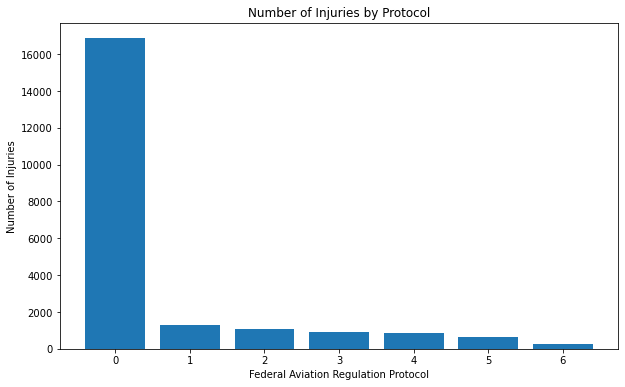

In [67]:
bar_chart_title = 'Number of Injuries by Protocol'
bar_chart_count_label = 'Number of Injuries'
bar_chart_series_label = 'Federal Aviation Regulation Protocol'

labels = list(df['Total.Injuries'].value_counts().index[:7])
values = list(df['FAR.Description'].value_counts()[:7])

figure, ax = plt.subplots(figsize=(10, 6))
ax.bar(labels, values)
ax.set_ylabel(bar_chart_count_label)
ax.set_xlabel(bar_chart_series_label)
ax.set_title(bar_chart_title);

In [68]:
far_counts = df['FAR.Description'].value_counts()
far_counts.sort_index(inplace=True)
far_counts

091                         16866
121                           622
125                             3
129                           287
133                            90
135                           831
137                          1049
ARMF                            4
Non-U.S., Commercial          895
Non-U.S., Non-Commercial     1271
Public Use                    176
Unknown                       259
Name: FAR.Description, dtype: int64

In [70]:
far_injuries = df.groupby(['FAR.Description'])['Total.Injuries'].sum()
far_injuries.sort_index(inplace=True)
far_injuries

FAR.Description
091                         11847.0
121                          1454.0
125                             0.0
129                          1355.0
133                            66.0
135                          1000.0
137                           420.0
ARMF                            1.0
Non-U.S., Commercial         5094.0
Non-U.S., Non-Commercial     2380.0
Public Use                    170.0
Unknown                       440.0
Name: Total.Injuries, dtype: float64

In [71]:
far_injury_rate = far_injuries/far_counts
far_injury_rate.sort_index(inplace=True)
far_injury_rate

FAR.Description
091                         0.702419
121                         2.337621
125                         0.000000
129                         4.721254
133                         0.733333
135                         1.203369
137                         0.400381
ARMF                        0.250000
Non-U.S., Commercial        5.691620
Non-U.S., Non-Commercial    1.872541
Public Use                  0.965909
Unknown                     1.698842
dtype: float64

In [72]:
far_injury_rate.to_csv('far_injury_rate.csv')